In [47]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, Reshape
import matplotlib.pyplot as plt

In [48]:
inputs = []
targets = []

In [49]:
for i in range(52):
    with open('data.json', 'r') as fp:
        data = json.load(fp)
        inputs = inputs + data['roi']
        targets = targets + data['peak']

In [50]:
inputs = np.array(inputs)
targets = np.array(targets)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]

In [52]:
X_train.shape
input_shape=X_train[0].shape
input_shape

(20, 1)

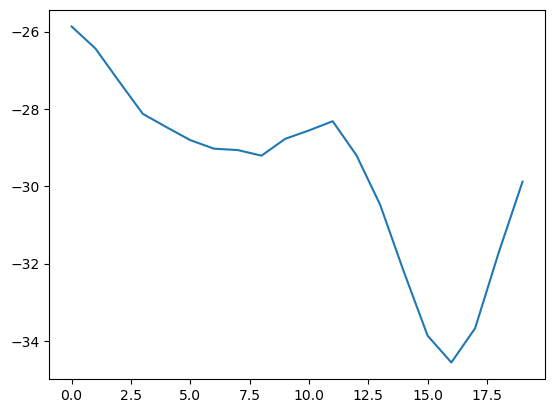

In [53]:
plt.plot(X_train[50])

In [64]:
model = Sequential()

model.add(Conv1D(filters=20, kernel_size=3, activation='relu', input_shape=input_shape))

model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))

model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 18, 20)            80        
                                                                 
 conv1d_23 (Conv1D)          (None, 16, 16)            976       
                                                                 
 conv1d_24 (Conv1D)          (None, 14, 8)             392       
                                                                 
 flatten_7 (Flatten)         (None, 112)               0         
                                                                 
 dense_21 (Dense)            (None, 16)                1808      
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dense_23 (Dense)            (None, 4)                

In [67]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=50, batch_size=32)

Epoch 1/50
746/746 [==============================] - 2s 2ms/step - loss: 0.4448 - binary_accuracy: 0.7609 - val_loss: 0.2431 - val_binary_accuracy: 0.9046
Epoch 2/50
746/746 [==============================] - 1s 2ms/step - loss: 0.2053 - binary_accuracy: 0.9248 - val_loss: 0.1677 - val_binary_accuracy: 0.9333
Epoch 3/50
746/746 [==============================] - 1s 1ms/step - loss: 0.1683 - binary_accuracy: 0.9316 - val_loss: 0.1445 - val_binary_accuracy: 0.9348
Epoch 4/50
746/746 [==============================] - 1s 1ms/step - loss: 0.1499 - binary_accuracy: 0.9349 - val_loss: 0.1288 - val_binary_accuracy: 0.9389
Epoch 5/50
746/746 [==============================] - 1s 1ms/step - loss: 0.1363 - binary_accuracy: 0.9416 - val_loss: 0.1214 - val_binary_accuracy: 0.9476
Epoch 6/50
746/746 [==============================] - 1s 1ms/step - loss: 0.1264 - binary_accuracy: 0.9467 - val_loss: 0.1158 - val_binary_accuracy: 0.9517
Epoch 7/50
746/746 [==============================] - 1s 1ms/ste

In [68]:
prediction = model.predict(X_test)

83/83 [==============================] - 0s 795us/step


[0.9999807]


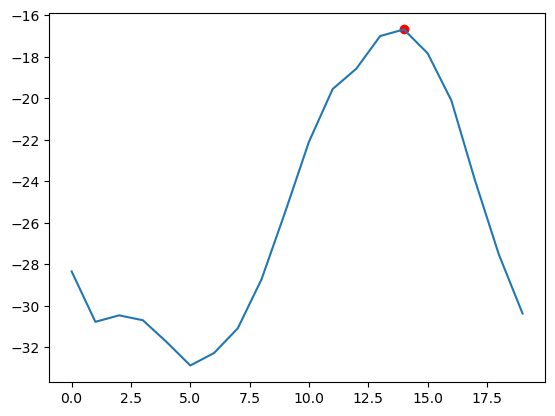

In [69]:
plt.plot(X_test[62])
plt.scatter(np.argmax(X_test[62]), max(X_test[62]), c='r')
print(prediction[62])

In [70]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
